In [1]:
from collections import OrderedDict
import gzip
import numpy as np
def load_diffs_from_file(file):
    diffs = OrderedDict()
    fp = open(file, "rb")
    for line in fp:
        line = line.decode('utf8').strip().split(": ")
        method = line[0]
        metrics = line[1].strip("[").strip("]").split(',')
        for i in range(len(metrics)):
            metrics[i] = float(metrics[i])
        diffs[method] = metrics
    fp.close()
    print("#Loaded " + str(len(diffs)) + " methods from " + file)
    return diffs

In [2]:
diffs = load_diffs_from_file('sim_pos_and_neg_position_auroc_auprc.txt')
methods = list(diffs.keys())
aurocs = [d[0] for d in list(diffs.values())]
auprcs = [d[1] for d in list(diffs.values())]

#Loaded 14 methods from sim_pos_and_neg_position_auroc_auprc.txt


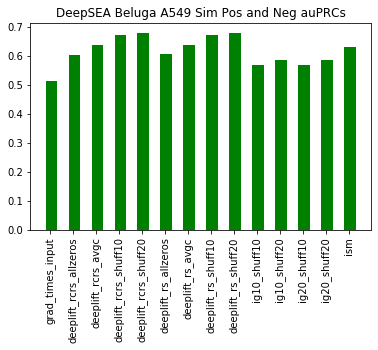

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.tight_layout(pad=3.0)

ind = np.arange(len(methods))
width = 0.50

p1 = ax.bar(ind, auprcs, width, bottom=0, align='center', color='blue')
ax.set_title('DeepSEA Beluga A549 Sim Pos and Neg auPRCs')
ax.set_xticks(ind - width/8)
ax.set_xticklabels(methods, rotation=90)
ax.autoscale_view()

plt.show()